# 模块导入

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType
from pyecharts.charts import Map 
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())
sns.set()#切换到seaborn的默认运行配置


# 数据处理

# #数据导入与总览

In [9]:
data=pd.read_csv("listings.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28452 entries, 0 to 28451
Data columns (total 16 columns):
id                                28452 non-null int64
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dt

In [10]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
2,128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93


In [11]:
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.845200e+04,2.845200e+04,0.0,28452.000000,28452.000000,28452.000000,28452.000000,28452.000000,17294.000000,28452.000000,28452.000000
mean,2.628583e+07,1.442821e+08,NaN,39.983225,116.442000,611.203325,2.729685,7.103156,1.319757,12.818290,220.342120
std,6.403312e+06,7.057051e+07,NaN,0.186984,0.204796,1623.535077,17.920932,16.815067,1.581243,29.261321,138.430677
min,4.405400e+04,1.928750e+05,NaN,39.455810,115.473390,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.245616e+07,8.708958e+07,NaN,39.897330,116.355283,235.000000,1.000000,0.000000,0.290000,2.000000,87.000000
50%,2.787765e+07,1.525464e+08,NaN,39.930905,116.434665,389.000000,1.000000,1.000000,0.800000,5.000000,209.000000
75%,3.134482e+07,2.061464e+08,NaN,39.990470,116.491122,577.000000,1.000000,6.000000,1.750000,11.000000,361.000000
max,3.395441e+07,2.563498e+08,NaN,40.949660,117.495270,68983.000000,1125.000000,322.000000,20.000000,222.000000,365.000000


# #数据清洗与处理

In [12]:
data.drop("neighbourhood_group",axis=1,inplace=True)
data["number_of_reviews"].fillna(value=data["number_of_reviews"].median(),inplace=True) #中位值填充，极值差大
data["reviews_per_month"].fillna(value=data["reviews_per_month"].mean(),inplace=True) #均值填充
data["last_review"].fillna(value=data["last_review"].mode().iloc[0],inplace=True) #众数填充（多个众数时，填充第一个)
data["neighbourhood"]=data["neighbourhood"].apply(lambda x:re.sub("[A-Za-z0-9/]", "",x)) #滤除非汉字部分

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28452 entries, 0 to 28451
Data columns (total 15 columns):
id                                28452 non-null int64
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       28452 non-null object
reviews_per_month                 28452 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 3

# 数据分析

# #房东分析

In [14]:
df_host_id=data["host_id"].value_counts().head(120)

In [15]:
data["host_id"].value_counts().describe()

count    10792.000000
mean         2.636397
std          5.181313
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        222.000000
Name: host_id, dtype: float64

分析：总共10792名房东；人均拥有2.63套房源；最小值为1，最大值为222，极差为221；标准差为5.18，标准差系数为1.97.由这些统计数据可得：房东拥有的房源数量差异较大，分布较为分散，少部分人占据绝大多数房子，符合帕累托法则。

In [16]:
# bar=Bar(init_opts=opts.InitOpts(renderer = "svg"))#设置导出为svg
bar=Bar()
bar.add_xaxis(df_host_id.index.tolist())
bar.add_yaxis("",df_host_id.values.tolist())
bar.set_global_opts(title_opts=opts.TitleOpts(title="host_id Count", subtitle=""), 
                    visualmap_opts=opts.VisualMapOpts(is_show=True),
                    toolbox_opts=opts.ToolboxOpts(is_show=True),
                    xaxis_opts=opts.AxisOpts(name="host_id",axislabel_opts=opts.LabelOpts(rotate=90,font_size =7))) #x轴刻度标签设置
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

bar.render_notebook()
# make_snapshot(snapshot, bar.render(), "bar0.svg") #导出为svg

分析：从分布形态来看，房东的房源数量呈现长尾分布，大量房源集中在少部分头部房东身上，而绝大多数房东的房源量仅为1.

# #区域分析

In [17]:
data["neighbourhood"]=data["neighbourhood"].apply(lambda x: x.replace("县","区"))
df_neighbourhood=data["neighbourhood"].value_counts()
df_neighbourhood

朝阳区       10810
东城区        3346
海淀区        3197
丰台区        1758
西城区        1701
通州区        1290
昌平区        1034
密云区         935
顺义区         920
怀柔区         833
大兴区         823
延庆区         718
房山区         579
石景山区        213
门头沟区        152
平谷区         143
Name: neighbourhood, dtype: int64

In [18]:
df_neighbourhood.describe()

count       16.000000
mean      1778.250000
std       2587.490509
min        143.000000
25%        683.250000
50%        927.500000
75%       1715.250000
max      10810.000000
Name: neighbourhood, dtype: float64

In [19]:
from pyecharts.charts import Page, Pie

def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(df_neighbourhood.index.tolist(), df_neighbourhood.values.tolist())])
        .set_global_opts(title_opts=opts.TitleOpts(title=""),legend_opts=opts.LegendOpts(is_show=False
            ))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    )
    return c
pie_base().render_notebook()
# pie_base().render()

In [20]:
c = (
        Map()
        .add(
            "geo",
            [list(z) for z in zip(df_neighbourhood.index.tolist(), df_neighbourhood.values.tolist())],
            '北京',
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=11000,is_piecewise=True),
            title_opts=opts.TitleOpts(title="房源分布"),
        )
    )

c.render_notebook()

分析：房源集中在朝阳、东城和海淀三个大区，占据了全部房源的70%左右，石景山区、门头沟区、平谷区等远离市中心的城区房源较少。

In [21]:
data.groupby("neighbourhood")[["minimum_nights","number_of_reviews","reviews_per_month","availability_365"]].median().sort_values(by="number_of_reviews",ascending=False)

,minimum_nights,number_of_reviews,reviews_per_month,availability_365
neighbourhood,,,,
东城区,1.0,3.0,1.319757,168.0
朝阳区,1.0,2.0,1.319757,181.0
海淀区,1.0,2.0,1.319757,313.0
西城区,1.0,2.0,1.319757,180.0
丰台区,1.0,1.0,1.319757,298.0
大兴区,1.0,1.0,1.319757,351.0
昌平区,1.0,1.0,1.319757,181.0
石景山区,1.0,1.0,1.319757,316.0
顺义区,1.0,1.0,1.319757,297.5


In [22]:
data.groupby("neighbourhood")[["minimum_nights","number_of_reviews","reviews_per_month","availability_365"]].mean().sort_values(by="number_of_reviews",ascending=False)

,minimum_nights,number_of_reviews,reviews_per_month,availability_365
neighbourhood,,,,
东城区,2.407053,14.340406,1.677971,195.798864
西城区,2.452675,8.847737,1.496890,207.766608
朝阳区,3.290934,8.220722,1.369384,212.362905
海淀区,3.686894,6.731936,1.251817,227.202690
丰台区,2.129693,5.385097,1.293091,235.195108
石景山区,1.845070,4.051643,1.168151,231.812207
顺义区,2.723913,3.777174,1.208822,237.038043
大兴区,2.221142,3.766707,1.084263,250.302552
昌平区,2.639265,2.611219,1.014224,221.712766


分析:东西城区、朝阳区的房源评论数较多，需求较多。

# #房屋类型分析

In [23]:
df_room_type=data["room_type"].value_counts()
df_room_type

Entire home/apt    16955
Private room        9838
Shared room         1659
Name: room_type, dtype: int64

In [49]:
def pie_rich_label() -> Pie:
    c = (
        Pie()
        .add(
            "",
            [list(z) for z in zip(df_room_type.index.tolist(), df_room_type.values.tolist())],
            radius=["40%", "55%"],#控制环形图
            label_opts=opts.LabelOpts(
                position="outside",
                formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
                background_color="#eee",
                border_color="#aaa",
                border_width=1,
                border_radius=4,
                rich={
                    "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                    "abg": {
                        "backgroundColor": "#e3e3e3",
                        "width": "100%",
                        "align": "right",
                        "height": 22,
                        "borderRadius": [4, 4, 0, 0],
                    },
                    "hr": {
                        "borderColor": "#aaa",
                        "width": "100%",
                        "borderWidth": 0.5,
                        "height": 0,
                    },
                    "b": {"fontSize": 16, "lineHeight": 33},
                    "per": {
                        "color": "#eee",
                        "backgroundColor": "#334455",
                        "padding": [2, 4],
                        "borderRadius": 2,
                    },
                },
            ),
        )
        .set_global_opts(title_opts=opts.TitleOpts(title=""),legend_opts=opts.LegendOpts(is_show=False
            ))
    )
    return c
pie_rich_label().render_notebook()

分析：目前市场上的房源以整租为主，占到60%左右上，而独立房间出租次之，房间合租则是最少。

In [25]:
data.groupby("room_type")[["minimum_nights","number_of_reviews","reviews_per_month","availability_365"]].median().sort_values(by="number_of_reviews",ascending=False)

,minimum_nights,number_of_reviews,reviews_per_month,availability_365
room_type,,,,
Entire home/apt,1,1,1.319757,290
Private room,1,1,1.319757,180
Shared room,1,1,1.319757,273


In [26]:
data.groupby("room_type")[["minimum_nights","number_of_reviews","reviews_per_month","availability_365"]].mean().sort_values(by="number_of_reviews",ascending=False)

,minimum_nights,number_of_reviews,reviews_per_month,availability_365
room_type,,,,
Private room,2.510673,7.610083,1.284395,201.532832
Entire home/apt,2.809732,6.873371,1.356829,230.702389
Shared room,3.210368,6.445449,1.150570,226.000603


分析：从minimum_nights 	number_of_reviews 	reviews_per_month 	availability_365这个维度来看，在中位数这个量值来看，房屋类型之间无显著差异，而从均值来看，Private room的评论数最多，而Shared room 的月均评论数较多，说明这两种类型房源较受欢迎且其租客较青睐评论。

# #价格分析

In [27]:
data["price"].describe()

count    28452.000000
mean       611.203325
std       1623.535077
min          0.000000
25%        235.000000
50%        389.000000
75%        577.000000
max      68983.000000
Name: price, dtype: float64

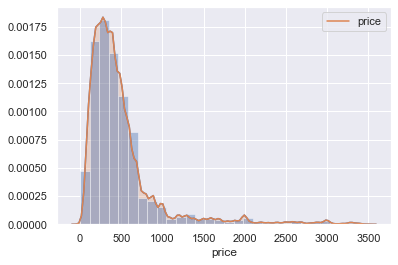

In [28]:
fig,ax1=plt.subplots(1,1)
sns.distplot(data.query("price<=3500")["price"],ax=ax1,bins=30) #面积分布情况（直方图 ）
sns.kdeplot(data[data["price"]<=3500]["price"],shade=True,ax=ax1)#生成核密度图

分析：整体上，价格比较集中，主要聚集在100-600之间， 最大值为68983可能为异常值，值得注意。

In [29]:
df_neighbourhood_price=data.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)
df_neighbourhood_price2=data.groupby("neighbourhood")["price"].median().sort_values(ascending=False)
df_neighbourhood_price3=data.groupby("neighbourhood")["price"].min().sort_values(ascending=False)
bar = (
        Bar()
        .add_xaxis(df_neighbourhood_price.index.tolist())
        .add_yaxis("价格均值", df_neighbourhood_price.values.tolist())
        .add_yaxis("价格中位数", df_neighbourhood_price2.values.tolist())
        .add_yaxis("价格最小值", df_neighbourhood_price3.values.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="Price-neighbourhood"),
                         xaxis_opts=opts.AxisOpts(name="",axislabel_opts=opts.LabelOpts(rotate=-45,font_size =12)))
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
                    opts.MarkPointItem(type_="min", name="最小值"),
                    opts.MarkPointItem(type_="average", name="平均值"),
                ]
            ),
        )
    )
bar.render_notebook()


分析：从城区房价分布来看，怀柔区的价格在均值、中位数、最小值等量值上均高于其他城区，而丰台区则价格较低。

In [30]:
df_roomtpye_price=data.groupby("room_type")["price"].mean().sort_values(ascending=False)
df_roomtpye_price2=data.groupby("room_type")["price"].median().sort_values(ascending=False)
df_roomtpye_price3=data.groupby("room_type")["price"].min().sort_values(ascending=False)
bar = (
        Bar()
        .add_xaxis(df_roomtpye_price.index.tolist())
        .add_yaxis("价格均值", df_roomtpye_price.values.tolist())
        .add_yaxis("价格中位数", df_roomtpye_price2.values.tolist())
#         .add_yaxis("价格最小值", df_roomtpye_price3.values.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="Price-roomtype"),
                         xaxis_opts=opts.AxisOpts(name="",axislabel_opts=opts.LabelOpts(rotate=0,font_size =12)))
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
                    opts.MarkPointItem(type_="min", name="最小值"),
                    opts.MarkPointItem(type_="average", name="平均值"),
                ]
            ),
        )
    )
bar.render_notebook()


In [31]:
df_roomtpye_price.describe()

count      3.000000
mean     492.117758
std      229.884939
min      299.192887
25%      364.937062
50%      430.681236
75%      588.580193
max      746.479151
Name: price, dtype: float64

分析：整租、独立房间出租、房间合租的价格一次递减，且差价在40%、30%，整租的利润空间最大。

# #时间序列分析

In [32]:
data["last_review"]=pd.to_datetime(data["last_review"],format="%Y-%m-%d")

In [33]:
data.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,朝阳区,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,密云区,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
2,128496,Heart of Beijing: House with View 2,467520,Cindy,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
3,161902,cozy studio in center of Beijing,707535,Robert,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
4,162144,"nice studio near subway, sleep 4",707535,Robert,朝阳区,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [34]:
data["year"]=data["last_review"].apply(lambda x:x.year)
data["month"]=data["last_review"].apply(lambda x:x.month)
data["day"]=data["last_review"].apply(lambda x:x.day)

In [35]:
data.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,朝阳区,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341,2019,3,4
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,密云区,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0,2017,10,8
2,128496,Heart of Beijing: House with View 2,467520,Cindy,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93,2019,2,5
3,161902,cozy studio in center of Beijing,707535,Robert,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290,2016,12,3
4,162144,"nice studio near subway, sleep 4",707535,Robert,朝阳区,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352,2018,8,1


In [36]:
df_year=data["year"].value_counts()

In [37]:
df_month=data["month"].value_counts().to_frame().reset_index().sort_values(by="index")

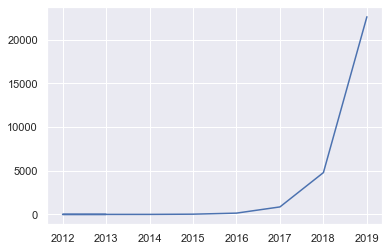

In [38]:
plt.plot(df_year.index.tolist(),df_year.values.tolist())

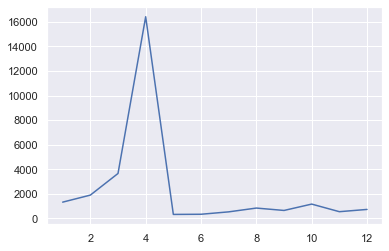

In [39]:
plt.plot(df_month["index"],df_month["month"])

分析：短租的信息从2016年开始增长，18-19年猛增；而从月份来看3-4月份是旺季，而5月之后属于淡季。

# 评论文本分析

In [40]:
df=pd.read_csv("reviews_detail.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202099 entries, 0 to 202098
Data columns (total 6 columns):
listing_id       202099 non-null int64
id               202099 non-null int64
date             202099 non-null object
reviewer_id      202099 non-null int64
reviewer_name    202093 non-null object
comments         201983 non-null object
dtypes: int64(3), object(3)
memory usage: 9.3+ MB


In [42]:
df["Chinese"]=df["comments"].apply(lambda x:re.sub("[A-Za-z0-9\!\%\?()./[\]\- 	:;,\。 ' ...r'\n\r\n\r\n' 	]", "",str(x))) #滤除非汉字部分

In [43]:
 df["English"]=df["comments"].apply(lambda x:''.join(re.findall(r'[  A-Za-z ]', str(x))))

In [44]:
df.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Chinese,English
202094,33889408,438178936,2019-04-16,255996319,小倩,"很不错的,去之前提供的位置信息特别详细,房东有心了,位置很便利,设施也很齐全,非常好的一次住...",很不错的去之前提供的位置信息特别详细房东有心了位置很便利设施也很齐全非常好的一次住宿体验~,
202095,33890728,438182720,2019-04-16,255995373,志辉,"非常棒的房子,住的很开心｡ 地址位置很方便, 房间布置和装修都很奈斯,沙发床特别舒服哈哈",非常棒的房子住的很开心｡地址位置很方便房间布置和装修都很奈斯沙发床特别舒服哈哈,
202096,33891613,438182693,2019-04-16,255994654,天佑,"房间布置明亮温暖而别有风格,指引周到而迅速,房间内设施齐全､空间宽敞!",房间布置明亮温暖而别有风格指引周到而迅速房间内设施齐全､空间宽敞,
202097,33892088,438119657,2019-04-16,255993753,志强,"各方面这个价位性价比是非常之高了,房东人也很好,交通便利,我个人是很满意的,有机会还会来｡",各方面这个价位性价比是非常之高了房东人也很好交通便利我个人是很满意的有机会还会来｡,
202098,33925874,438572523,2019-04-17,256375057,玲,The host canceled this reservation 13 days bef...,,The host canceled this reservation days befor...


In [45]:
df["Chinese"].to_csv("Chinese_comments.csv",index=False,header=False)
df["English"].to_csv("English_comments.csv",index=False,header=False)

In [46]:
import jieba
excludes = {"我们","特别","可以","入住","非常","房东","房间","真的","但是","还有","没有","问题","一个"}#{"将军","却说","丞相"}
txt = open("Chinese_comments.csv", "r", encoding='utf-8').read()
words  = jieba.lcut(txt)
counts = {}
for word in words:
    if len(word) == 1:  #排除单个字符的分词结果
        continue
    else:
        counts[word] = counts.get(word,0) + 1
for word in excludes:
    del(counts[word])
items = list(counts.items())
items.sort(key=lambda x:x[1], reverse=True) 
# for i in range(15):
#     word, count = items[i]
#     print ("{0:<10}{1:>5}".format(word, count))


In [47]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
word = WordCloud()
word.add('',items[:50],word_size_range=[20, 100],shape=SymbolType.DIAMOND)
word.set_global_opts(title_opts=opts.TitleOpts(title="comments WordCloud"))
word.render_notebook()

分析：租客关注点偏向一下四项
房主：'房东','热情'
房子：'房间','设施','干净','整洁','装修'
位置：'地理位置','附近','地铁站','交通'
价格：'性价比'

# #特征相关性

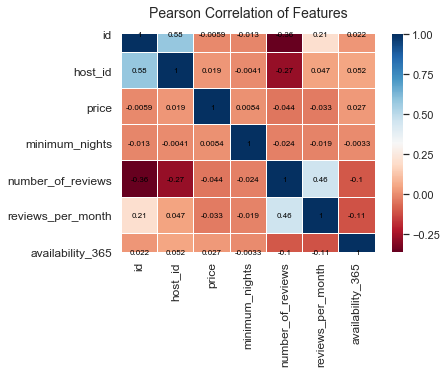

In [48]:
data=data[["id","host_id","neighbourhood", "room_type", "price" ,"minimum_nights", "number_of_reviews" ,"last_review", "reviews_per_month" ,"availability_365"]]
colormap = plt.cm.RdBu
fig3,ax1=plt.subplots(1,1)
plt.title('Pearson Correlation of Features', y=1.05, size=14)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True,annot_kws={'size':8,'color':'black'},ax=ax1)
ax1.tick_params(axis='y',labelsize=12)
ax1.tick_params(axis='x',labelsize=12)
plt.show()